
<p>CS210-Data Science Project Phase#2</p>
<p>2023-2024 Spring
<p>Osman Şah Yılmaz</p>

## Introduction

<font color="white">
<h3>The exploration now includes an innovative dimension: analyzing the correlation between
social media signals — measured through the weight of tweets consists “GPT” word— and stock
market indicators for Nvidia. Initial findings suggest intriguing interplays between market
sentiment, as expressed on social media, and the stock's trading performance. The daily
granularity of the dataset provides a vivid depiction of the stock's rhythm, enhancing our
understanding of its volatility and trading patterns.

</font>

### Utilized Datasets

<font color="cyan">
https://www.kaggle.com/datasets/saketk511/2019-2024-us-stock-market-data
</font> <br>
<font color="cyan">https://www.kaggle.com/datasets/konradb/gpt4-the-tweets</font> <br>


## ***Exploratory Data Analysis***

In [ ]:
# Importing packages
import pandas as pd
import numpy as np
import random as rnd

# Importing visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Accessing Data with OS Path
from os.path import join

# Accessing data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# to be used a prefix for all files
path_prefix = "/content/drive/My Drive/CS210/Project"

Mounted at /content/drive


In [ ]:
fname_stock = "Stock Market Dataset.csv"
df_stock = pd.read_csv(join(path_prefix, fname_stock))

In [ ]:
nvidia_df = df_stock.filter(['Date','Nvidia_Price','Nvidia_Vol.'], axis=1)
nvidia_df['Date'] = pd.to_datetime(nvidia_df['Date'], dayfirst=True)
nvidia_df = nvidia_df[(nvidia_df['Date'] >= '2022-12-05') & (nvidia_df['Date'] <= '2023-04-12')]

In [ ]:
nvidia_vol_df = df_stock.filter(['Date','Nvidia_Price','Nvidia_Vol.'], axis=1)
nvidia_df['Date'] = pd.to_datetime(nvidia_df['Date'], dayfirst=True)
nvidia_df = nvidia_df[(nvidia_df['Date'] >= '2022-12-05') & (nvidia_df['Date'] <= '2023-04-12')]

<ipython-input-4-03bcaa1c8268>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_df['Date'] = pd.to_datetime(nvidia_df['Date'], dayfirst=True)


In [ ]:
df_stock.sort_values(by="Date", ascending=False)

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
518,518,31-12-2021,3.730,93100.0,75.21,237120.0,4.4635,36980.0,"46,219.50",58180.0,...,"4,50,662",1450.0,602.44,2000000.0,166.72,47830000.0,336.35,12870000.0,"1,828.60",106600.0
764,764,31-12-2020,2.539,111110.0,48.52,181890.0,3.5190,42980.0,"28,949.40",136690.0,...,"3,47,815",270.0,540.73,5390000.0,162.85,59140000.0,273.16,12900000.0,"1,895.10",130630.0
1013,1013,31-12-2019,2.189,116890.0,61.06,494540.0,2.7970,42720.0,"7,196.40",586600.0,...,"3,39,590",140.0,323.57,3710000.0,92.39,50210000.0,205.25,8960000.0,"1,523.10",220850.0
64,64,31-10-2023,3.575,238330.0,81.02,346010.0,3.6490,72260.0,"34,650.60",43400.0,...,"5,17,825",6610.0,411.69,3870000.0,133.09,48970000.0,301.27,18040000.0,"1,994.30",214780.0
315,315,31-10-2022,6.355,128750.0,86.53,285340.0,3.3575,15270.0,"20,496.30",327470.0,...,"4,45,050",3850.0,291.88,7510000.0,102.44,99250000.0,93.16,120760000.0,"1,640.70",128410.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1224,01-03-2019,2.859,134660.0,55.80,684190.0,2.9320,75970.0,"3,821.90",1740000.0,...,"3,04,860",210.0,357.32,5530000.0,83.59,99500000.0,162.28,11100000.0,"1,299.20",343470.0
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
252,252,01-02-2023,2.536,88090.0,76.41,360860.0,4.1110,88150.0,"23,725.60",333180.0,...,"4,70,606",4420.0,361.99,7970000.0,105.15,76150000.0,153.12,47550000.0,"1,927.80",2290.0
498,498,01-02-2022,4.751,140790.0,88.20,376840.0,4.4315,180.0,"38,709.70",55200.0,...,"4,71,184",1930.0,457.13,22570000.0,151.19,59220000.0,319.00,18020000.0,"1,801.50",128880.0


In [ ]:
nvidia_df.head()

,Date,Nvidia_Price,Nvidia_Vol.
204,2023-04-12,264.95,44350000.0
205,2023-04-11,271.69,30230000.0
206,2023-04-10,275.79,37980000.0
207,2023-04-06,270.37,39770000.0
208,2023-04-05,268.81,50330000.0


In [ ]:
nvidia_df.tail()

,Date,Nvidia_Price,Nvidia_Vol.
287,2022-12-09,170.01,46530000.0
288,2022-12-08,171.69,51310000.0
289,2022-12-07,161.20,37160000.0
290,2022-12-06,159.87,35190000.0
291,2022-12-05,166.10,35010000.0


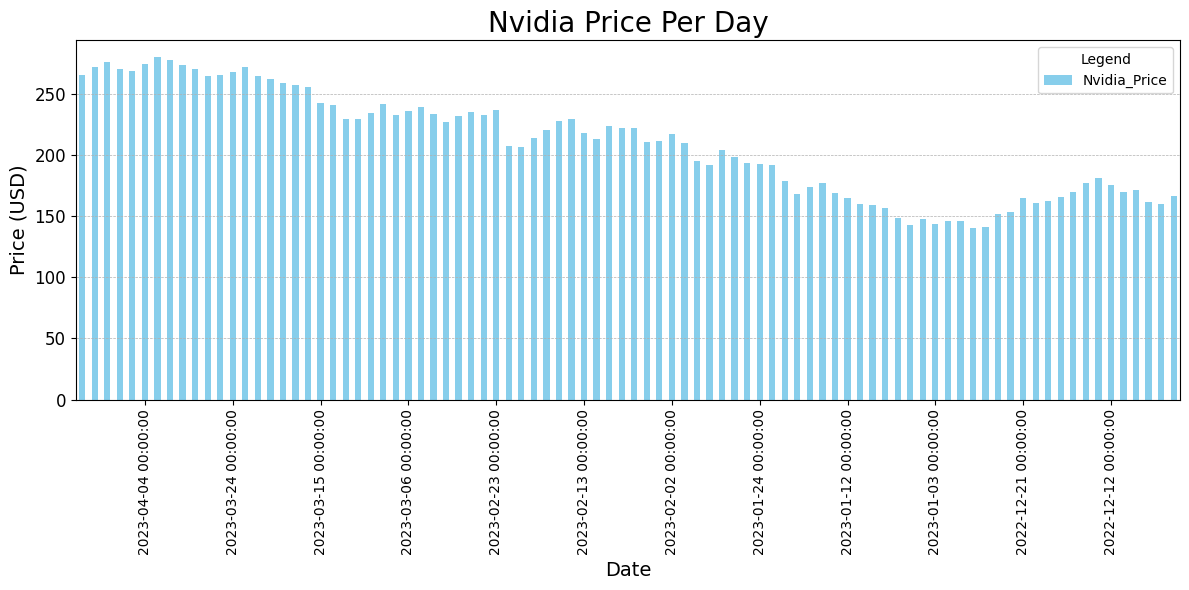

In [ ]:
import matplotlib.dates as mdates

# Plotting the histogram of tweets per day
ax = nvidia_df.plot(kind='bar', x='Date', y='Nvidia_Price', legend=True, color='skyblue',figsize=(12,6))

# Rotate date labels
plt.xticks(rotation=90)

# Set a more reasonable x-ticks density, e.g., one tick per week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Adjust the tick parameters
plt.tick_params(axis='x', which='major', labelsize=10)  # Adjust the size as needed
plt.tick_params(axis='y', which='major', labelsize=12)

# Increase label and title size
plt.title('Nvidia Price Per Day', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)

# Gridlines
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Adjust legend
plt.legend(title='Legend')

# Show plot with tight layout
plt.tight_layout()

plt.show()

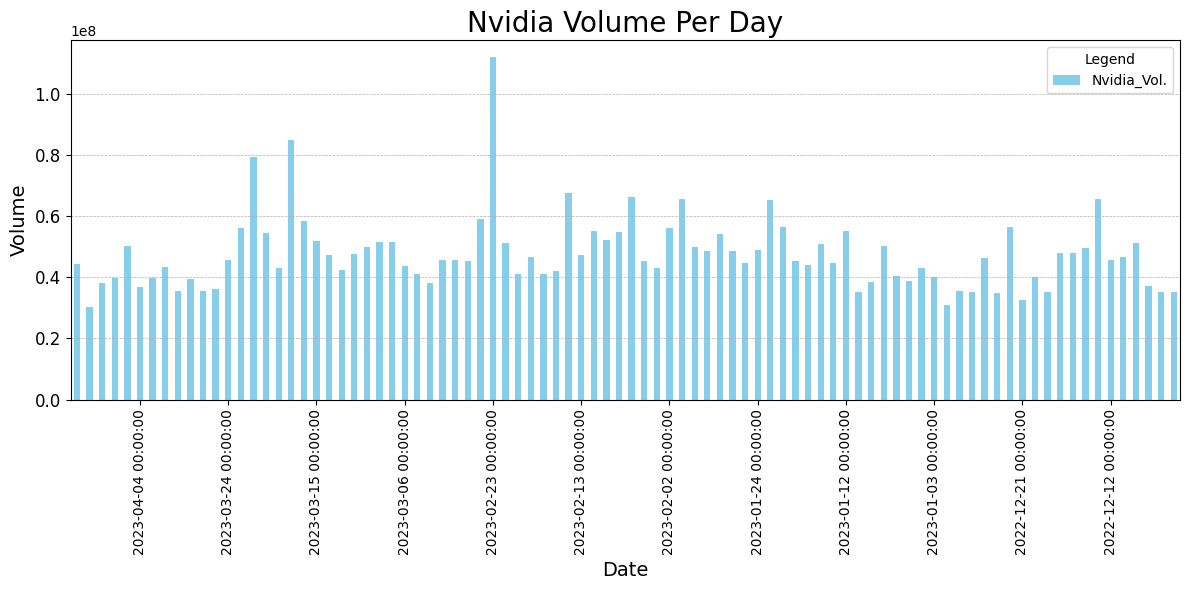

In [ ]:
import matplotlib.dates as mdates

# Plotting the histogram of tweets per day
ax = nvidia_df.plot(kind='bar', x='Date', y='Nvidia_Vol.', legend=True, color='skyblue',figsize=(12,6))

# Rotate date labels
plt.xticks(rotation=90)

# Set a more reasonable x-ticks density, e.g., one tick per week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Adjust the tick parameters
plt.tick_params(axis='x', which='major', labelsize=10)  # Adjust the size as needed
plt.tick_params(axis='y', which='major', labelsize=12)

# Increase label and title size
plt.title('Nvidia Volume Per Day', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume', fontsize=14)

# Gridlines
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Adjust legend
plt.legend(title='Legend')

# Show plot with tight layout
plt.tight_layout()

plt.show()

In [ ]:
fname_tweets = "tweets.csv"

df_tweets = pd.read_csv(join(path_prefix, fname_tweets), lineterminator='\n')
df_tweets.drop(['user_name', 'text', 'user_location', 'user_description', 'user_created', 'user_friends', 'user_favourites', 'user_verified', 'hashtags', 'source'], axis=1, inplace=True)
df_tweets['date'] = pd.to_datetime(df_tweets['date'], errors='coerce')

<ipython-input-10-5b133a1a16f8>:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tweets = pd.read_csv(join(path_prefix, fname_tweets), lineterminator='\n')


In [ ]:
# Step 1: Extract date from 'DateTime' and group by this date
# This will create a series with dates as the index and counts as the values
tweet_weights_per_day = df_tweets.groupby('date').apply(lambda x: (x['user_followers']).sum())


# Step 2: Convert the series to a new dataframe if you need a dataframe format
tweet_weights_per_day_df = tweet_weights_per_day.reset_index()
tweet_weights_per_day_df.columns = ['Date', 'TweetWeight']

tweet_weights_per_day_df['Date'] = pd.to_datetime(tweet_weights_per_day_df['Date']).dt.date

tweet_weights_per_day_df.dtypes
# Now 'tweets_per_day_df' is your new dataframe with the count of tweets per day
tweet_weights_per_day_df

tweet_weights_per_day_df = tweet_weights_per_day_df.groupby('Date')['TweetWeight'].sum().reset_index()
tweet_weights_per_day_df
tweet_weights_per_day_df['SqrtTweetWeight'] = np.sqrt(tweet_weights_per_day_df['TweetWeight'])

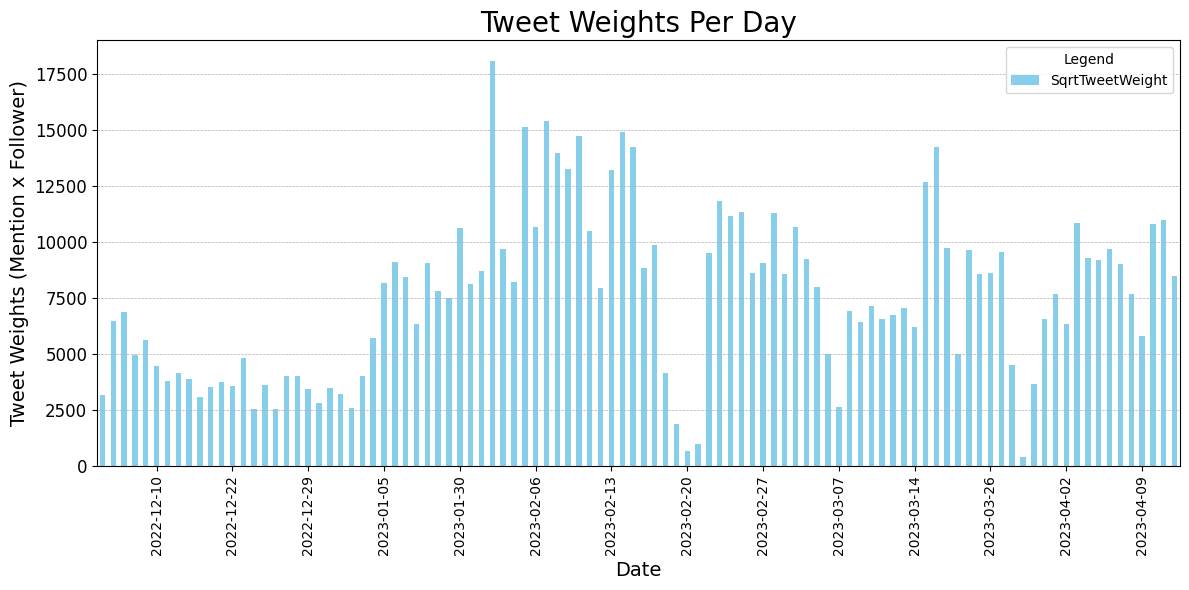

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting the histogram of tweets per day
ax = tweet_weights_per_day_df.plot(kind='bar', x='Date', y='SqrtTweetWeight', legend=True, color='skyblue',figsize=(12,6))

# Rotate date labels
plt.xticks(rotation=90)

# Set a more reasonable x-ticks density, e.g., one tick per week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Adjust the tick parameters
plt.tick_params(axis='x', which='major', labelsize=10)  # Adjust the size as needed
plt.tick_params(axis='y', which='major', labelsize=12)

# Increase label and title size
plt.title('Tweet Weights Per Day', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Tweet Weights (Mention x Follower)', fontsize=14)

# Gridlines
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Adjust legend
plt.legend(title='Legend')

# Show plot with tight layout
plt.tight_layout()

plt.show()


In [ ]:
nvidia_df.sort_index(ascending=False, inplace=True)

In [ ]:
tweet_weights_per_day_df['Date']

0     2022-12-05
1     2022-12-06
2     2022-12-07
3     2022-12-08
4     2022-12-09
         ...    
95    2023-04-08
96    2023-04-09
97    2023-04-10
98    2023-04-11
99    2023-04-12
Name: Date, Length: 100, dtype: object

In [ ]:
nvidia_df['Date']

291   2022-12-05
290   2022-12-06
289   2022-12-07
288   2022-12-08
287   2022-12-09
         ...    
208   2023-04-05
207   2023-04-06
206   2023-04-10
205   2023-04-11
204   2023-04-12
Name: Date, Length: 88, dtype: datetime64[ns]

In [ ]:
tweet_weights_per_day_df['Date'] = pd.to_datetime(tweet_weights_per_day_df['Date'], utc=True)
nvidia_df['Date'] = pd.to_datetime(nvidia_df['Date'], utc=True)

In [ ]:
# Combined since the date differences and ease of use
combined_df = pd.merge(tweet_weights_per_day_df, nvidia_df, on='Date', how='inner')

In [ ]:
combined_df['SqrtTradeVol'] = np.sqrt(combined_df['Nvidia_Vol.'])

Text(839.0858585858584, 0.5, 'Nvidia Volume')

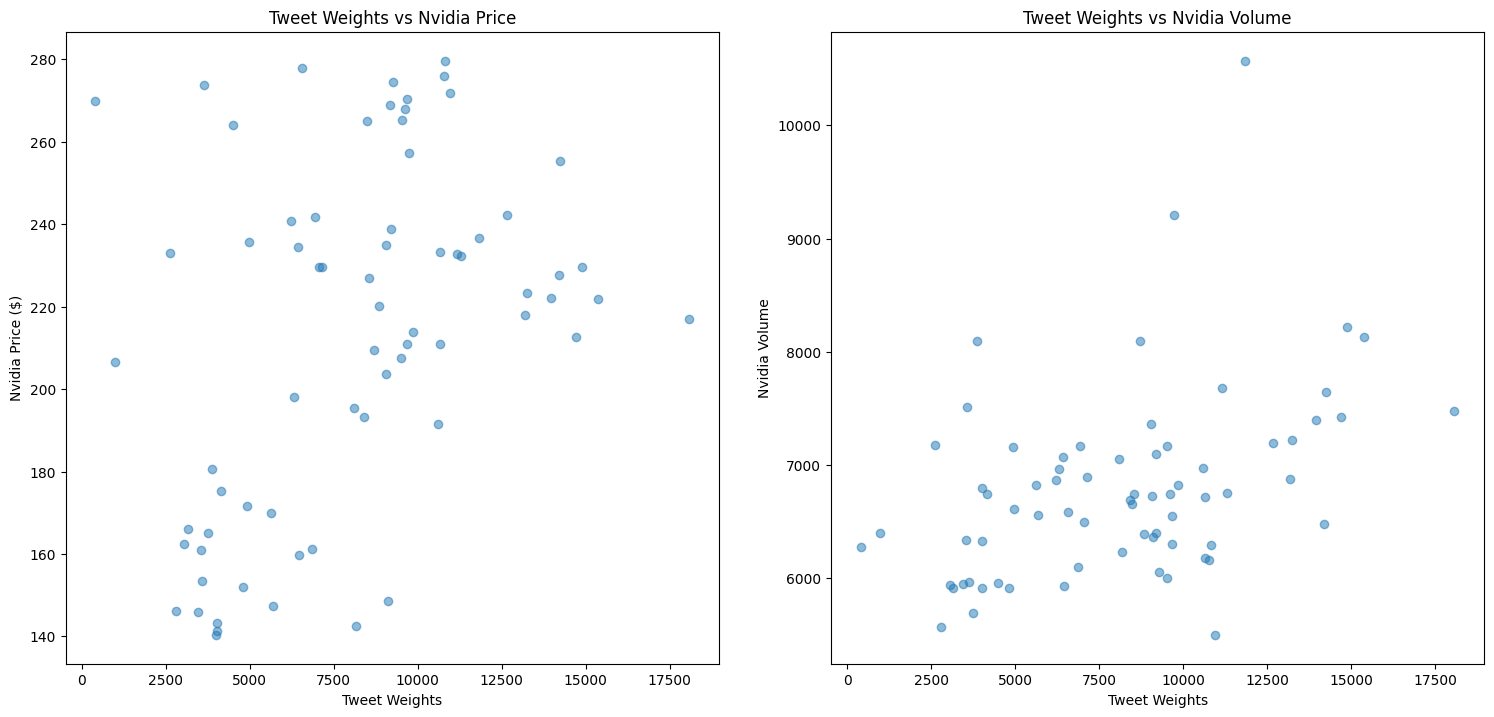

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout(pad=5.0)

axs[0].scatter(combined_df['SqrtTweetWeight'], combined_df['Nvidia_Price'], alpha=0.5)
axs[0].set_title('Tweet Weights vs Nvidia Price')
axs[0].set_xlabel('Tweet Weights')
axs[0].set_ylabel('Nvidia Price ($)')

axs[1].scatter(combined_df['SqrtTweetWeight'], combined_df['SqrtTradeVol'], alpha=0.5)
axs[1].set_title('Tweet Weights vs Nvidia Volume')
axs[1].set_xlabel('Tweet Weights')
axs[1].set_ylabel('Nvidia Volume')

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Date             70 non-null     datetime64[ns, UTC]
 1   TweetWeight      70 non-null     float64            
 2   SqrtTweetWeight  70 non-null     float64            
 3   Nvidia_Price     70 non-null     float64            
 4   Nvidia_Vol.      70 non-null     float64            
 5   SqrtTradeVol     70 non-null     float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 3.4 KB


## ***Hypothesis Testing***


In this section, our purpose is to determine our hypothesis and test it and make inferences using sample data over the population. We will do it with three steps as below:

1.   **Determine Hypothesis**

2.   **Test Using Statistics**

3. **Find p-value and Conclude**

**Hypothesis:** The weight of tweets consists “GPT” word results in volume increase in Nvidia Stock volume<br>


In [ ]:
from scipy import stats
from scipy import special

In conclusion, we can reject null hypothesis since p value < 0.05.
However, we see that we cannot say whether volume has an effect on increase in market volume since our probability is 56%.

In [ ]:
print("Correlation stats between SqrtTweetWeight and SqrtTradeVol:")
stats.pearsonr(combined_df["SqrtTweetWeight"], combined_df['SqrtTradeVol'])

Correlation stats between SqrtTweetWeight and SqrtTradeVol:


PearsonRResult(statistic=0.41403398601502617, pvalue=0.0003666374391050123)

As the correlation coefficient, we obtained 0.41 which states that the correlation between SqrtTweetWeight and SqrtTradeVol is not significant. From the p-value, less than the significance level, we can reject null hypothesis since p value < 0.05.

# ***LINEAR REGRESSION MODEL***


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

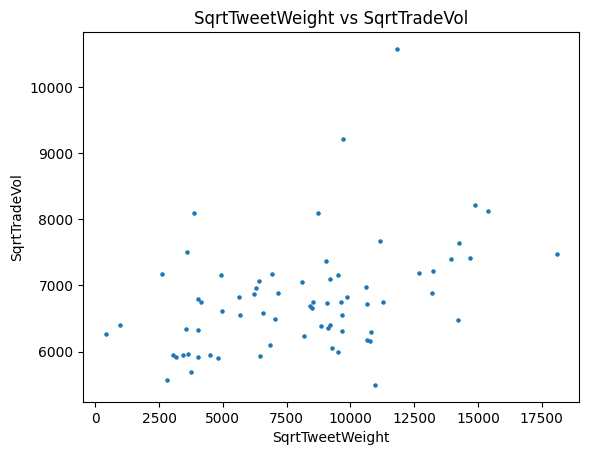

In [ ]:
combined_df.plot.scatter(x="SqrtTweetWeight", y="SqrtTradeVol", s=5)
plt.title("SqrtTweetWeight vs SqrtTradeVol")
plt.xlabel("SqrtTweetWeight")
plt.ylabel("SqrtTradeVol")
plt.show()

In [ ]:
# extracting the input and output vectors
X = combined_df['SqrtTweetWeight'].values.reshape(-1,1)  # converting to column vector
y = combined_df['SqrtTradeVol'].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# creating the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# intercept
b = model.intercept_
# slope
m = model.coef_

print(m, b, sep="\n")

[0.08126794]
6083.41622618089


In [ ]:
# a function to calculate the coefficient $R^2$. This function will take two parameters, namely *y_pred* and *y_true* and then calculate the $R^2$ as described above.
def r2(y_true, y_pred):
  u = sum((y_true - y_pred)**2)
  v = sum((y_true - y_true.mean())**2)

  return 1-(u/v)

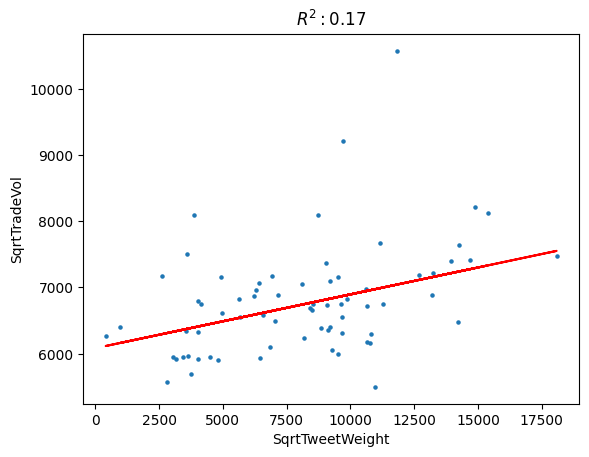

In [ ]:
# resulting regression line
rline = m[0]*X.flatten() + b

combined_df.plot.scatter(x="SqrtTweetWeight", y="SqrtTradeVol", s=5)
plt.plot(X.flatten(), rline, c="red")
plt.title(r"$R^2: {:.2f}$".format(r2(y, rline)))
plt.xlabel("SqrtTweetWeight")
plt.ylabel("SqrtTradeVol")
plt.show()

# ***MACHINE LEARNING MODELS***


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define features (X) and target variable (y)
X = combined_df[['SqrtTweetWeight']]  # Features (Tweet Weights About Consists GPT)
y = combined_df['SqrtTradeVol']  # Target variable (Nvidia Trade Volume)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the kNN model with 1 neighbor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)

# Predict on the test set
knn_predictions = knn.predict(X_test)

# Evaluate the model
knn_mse = mean_squared_error(y_test, knn_predictions)
print(f'kNN Mean Squared Error: {knn_mse}')


# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Predict on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f'DEcision Tree Mean Squared Error: {dt_mse}')



kNN Mean Squared Error: 1599861.306654042
DEcision Tree Mean Squared Error: 1599861.306654042
